In [2]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
from sklearn.model_selection import train_test_split
from keras.models import *
from keras.layers import *
import tensorflow
import glob
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.regularizers import l2
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping,ModelCheckpoint
import pickle
from tensorflow.keras.applications.resnet50 import ResNet50
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report
from sklearn import metrics
import seaborn as sns

## Load the Dataset

In [3]:
paths = []
labels = []
for dirname, _, filenames in os.walk('./TESS_Dataset/TESS Toronto emotional speech set data/'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        label = label.lower()
        labels.append(label)

print("Dataset is loaded")

Dataset is loaded


In [4]:
paths[:5]

['./TESS_Dataset/TESS Toronto emotional speech set data/OAF_angry/OAF_thin_angry.wav',
 './TESS_Dataset/TESS Toronto emotional speech set data/OAF_angry/OAF_deep_angry.wav',
 './TESS_Dataset/TESS Toronto emotional speech set data/OAF_angry/OAF_pole_angry.wav',
 './TESS_Dataset/TESS Toronto emotional speech set data/OAF_angry/OAF_lid_angry.wav',
 './TESS_Dataset/TESS Toronto emotional speech set data/OAF_angry/OAF_match_angry.wav']

In [5]:
labels[:5]

['angry', 'angry', 'angry', 'angry', 'angry']

## Create a DataFrame 

In [6]:
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,./TESS_Dataset/TESS Toronto emotional speech s...,angry
1,./TESS_Dataset/TESS Toronto emotional speech s...,angry
2,./TESS_Dataset/TESS Toronto emotional speech s...,angry
3,./TESS_Dataset/TESS Toronto emotional speech s...,angry
4,./TESS_Dataset/TESS Toronto emotional speech s...,angry


In [7]:
df['label'].value_counts()

angry      400
sad        400
fear       400
disgust    400
neutral    400
happy      400
ps         400
Name: label, dtype: int64

## Exploratory Data Analysis

<AxesSubplot: xlabel='label', ylabel='count'>

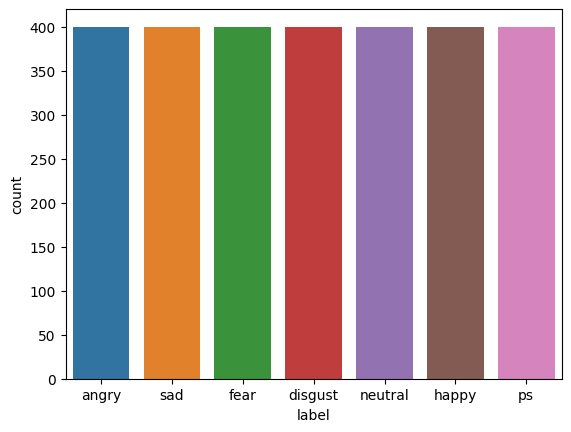

In [8]:
sns.countplot(x="label",data=df)

In [9]:
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
path

'./TESS_Dataset/TESS Toronto emotional speech set data/YAF_fear/YAF_white_fear.wav'

## Data Preprocessing

In [10]:
X = []
Y = []

In [11]:
def get_chromagram(path):
    
    y, sr = librosa.load(path)
    file_length = np.size(y)
    if file_length != sr*3:
        y = np.concatenate((y, np.zeros(sr*3-file_length)), axis=0)
        
    # Use an energy(magnitude) spectrum instead of power spectogram
    S = np.abs(librosa.stft(y))
    chroma = librosa.feature.chroma_stft(S=S,sr=sr,n_chroma=32)
    return chroma


In [12]:
#get_chromagram(paths[0])

In [13]:
def get_data(paths):
    for i in range(len(paths)):
        if i%50==0:
            print("i= ",i)
        chroma = get_chromagram(paths[i])
        X.append(chroma)
        Y.append(labels[i])

In [13]:
get_data(paths)

i=  0
i=  50
i=  100
i=  150
i=  200
i=  250
i=  300
i=  350
i=  400
i=  450
i=  500
i=  550
i=  600
i=  650
i=  700
i=  750
i=  800
i=  850
i=  900
i=  950
i=  1000
i=  1050
i=  1100
i=  1150
i=  1200
i=  1250
i=  1300
i=  1350
i=  1400
i=  1450
i=  1500
i=  1550
i=  1600
i=  1650
i=  1700
i=  1750
i=  1800
i=  1850
i=  1900
i=  1950
i=  2000
i=  2050
i=  2100
i=  2150
i=  2200
i=  2250
i=  2300
i=  2350
i=  2400
i=  2450
i=  2500
i=  2550
i=  2600
i=  2650
i=  2700
i=  2750


In [14]:
def draw_chromagram(path):
    plt.figure(figsize=(6,4))
    y, sr = librosa.load(path)
    S = np.abs(librosa.stft(y))    
    librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),y_axis='log', x_axis='time')
    plt.xlabel("Time",fontsize=12,fontweight='bold')
    plt.ylabel("Hz",fontsize=12,fontweight='bold')
    plt.title("Pleasant Surprise",fontsize=12,fontweight='bold')
    plt.savefig("Chromagram_Pleasant_Surprise")
    plt.show()

In [15]:
font = {'family' : '',
        'weight' : 'bold',
        'size'   : 8.5}

plt.rc('font', **font)

# Plotting the Chromagrams

# Fear 

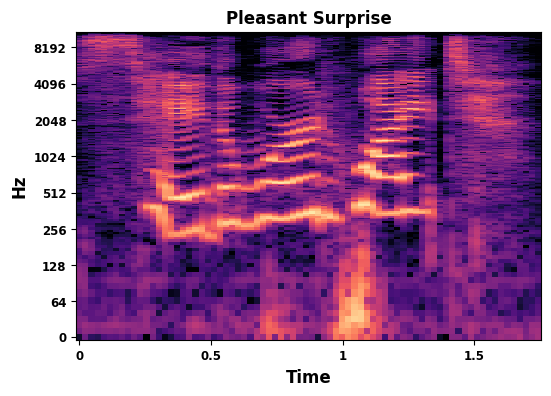

In [16]:
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
draw_chromagram(path)

# Angry 

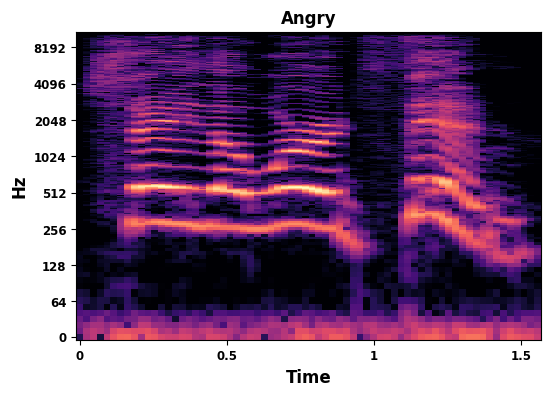

In [112]:
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[0]
draw_chromagram(path)

# Sad

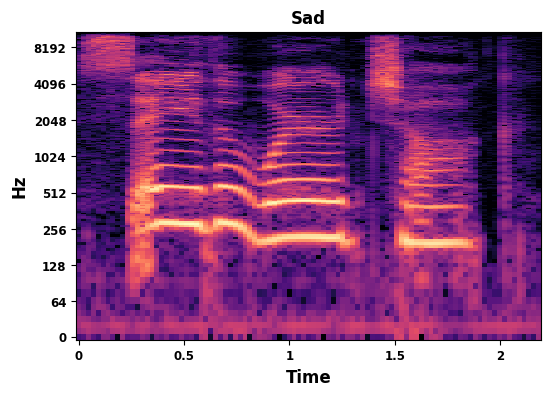

In [114]:
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[0]
draw_chromagram(path)

# Disgust

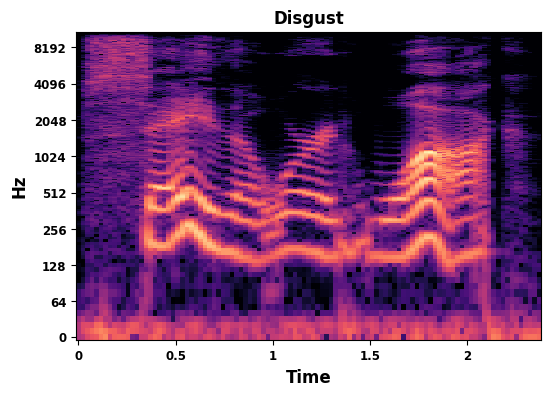

In [116]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
draw_chromagram(path)

# Neutral

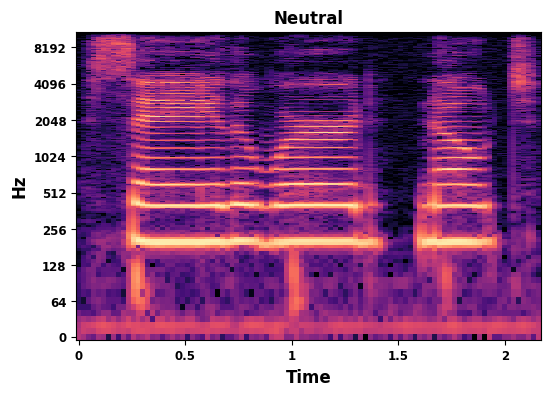

In [118]:
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
draw_chromagram(path)

# Happy

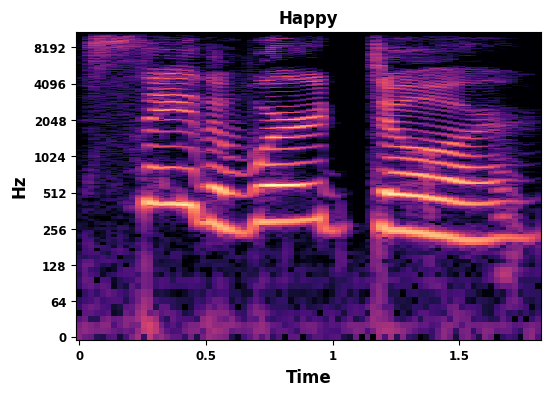

In [120]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[0]
draw_chromagram(path)

# Pleasant Surprise

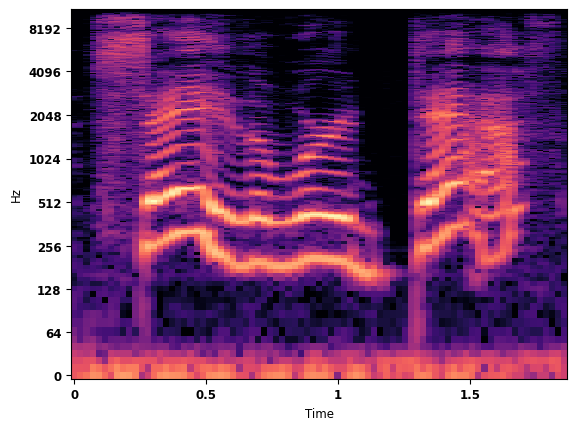

In [83]:
emotion = 'ps'
path = np.array(df['speech'][df['label']==emotion])[0]
draw_chromagram(path)

### One Hot Encoding

In [14]:
temp = X
temp = np.array(temp)

In [15]:
print(temp.shape)

(2800, 75, 130)


In [16]:
X = temp

In [17]:
print(type(X),X.shape)

<class 'numpy.ndarray'> (2800, 75, 130)


In [19]:
enc = OneHotEncoder()
Y = enc.fit_transform(df[['label']])
Y = Y.toarray()

In [20]:
print(Y.shape)

(2800, 7)


In [17]:
mappings={
    0:'angry',
    1:'sad',
    2:'fear',
    3:'disgust',
    4:'neutral',
    5:'happy',
    6:'surprise'
}

## Save the Data 

In [22]:
np.save('chromagram_X.npy', X) # save
np.save('chromagram_Y.npy',Y) # save

In [18]:
#Load the Data
X = np.load('chromagram_X.npy') # load
Y = np.load('chromagram_Y.npy') #load

In [19]:
print(X.shape,Y.shape)

(2800, 32, 130) (2800, 7)


### Split data in train,test and validation sets

In [20]:
X_Train,X_Test,Y_Train,Y_Test = train_test_split(X,Y,random_state=1,shuffle=True,test_size=0.2)

In [21]:
X_Train,X_Validation,Y_Train,Y_Validation = train_test_split(X_Train,Y_Train,random_state=2,shuffle=True,test_size=0.125)

In [22]:
print(X_Train.shape,Y_Train.shape)
print(X_Test.shape,Y_Test.shape)
print(X_Validation.shape,Y_Validation.shape)

(1960, 32, 130) (1960, 7)
(560, 32, 130) (560, 7)
(280, 32, 130) (280, 7)


## 1. Using CNN+LSTM

In [9]:
model = Sequential()
model.add(Conv2D(filters=64,kernel_size=3,strides=1,padding='same',input_shape=(32,130,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=2,strides=2))
model.add(Conv2D(filters=64,kernel_size=3,strides=1,padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=4,strides=4))
model.add(Reshape((-1,128)))
model.add(LSTM(32))
model.add(Dense(7,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [11]:
adam = Adam(lr=0.0003)
model.compile(loss='categorical_crossentropy',optimizer=adam,metrics=['accuracy'])

In [14]:
best_model = ModelCheckpoint('./best_model_chromagram_cnn_lstm.h5', monitor='val_accuracy', mode='max', save_best_only=True)

In [12]:
X_Train = X_Train.reshape((-1,32,130,1))
X_Validation = X_Validation.reshape((-1,32,130,1))
X_Test = X_Test.reshape((-1,32,130,1))

In [15]:
hist = model.fit(X_Train,Y_Train,shuffle=True,batch_size=16,epochs=100,validation_data=(X_Validation,Y_Validation),callbacks=[best_model])

Epoch 1/100
123/123 [==============================] - 9s 49ms/step - loss: 1.4935 - accuracy: 0.4699 - val_loss: 2.0333 - val_accuracy: 0.1714
Epoch 2/100
123/123 [==============================] - 5s 43ms/step - loss: 0.7378 - accuracy: 0.7954 - val_loss: 2.5525 - val_accuracy: 0.1500
Epoch 3/100
123/123 [==============================] - 5s 43ms/step - loss: 0.4491 - accuracy: 0.8796 - val_loss: 2.9730 - val_accuracy: 0.2250
Epoch 4/100
123/123 [==============================] - 5s 44ms/step - loss: 0.3218 - accuracy: 0.9173 - val_loss: 2.9786 - val_accuracy: 0.1964
Epoch 5/100
123/123 [==============================] - 6s 50ms/step - loss: 0.2180 - accuracy: 0.9617 - val_loss: 1.6986 - val_accuracy: 0.3714
Epoch 6/100
123/123 [==============================] - 7s 57ms/step - loss: 0.1886 - accuracy: 0.9587 - val_loss: 0.5344 - val_accuracy: 0.7893
Epoch 7/100
123/123 [==============================] - 7s 55ms/step - loss: 0.1307 - accuracy: 0.9776 - val_loss: 0.2642 - val_accuracy:

In [16]:
!touch saved_hist_chromagram_cnn_lstm.pkl

In [17]:
with open('saved_hist_chromagram_cnn_lstm.pkl','wb') as f:
    pickle.dump(hist.history,f)

In [13]:
with open('saved_hist_chromagram_cnn_lstm.pkl', 'rb') as f:
    history = pickle.load(f)

## Plot the results

In [14]:
acc = history['accuracy']
val_acc = history['val_accuracy']
loss = history['loss']
val_loss = history['val_loss']

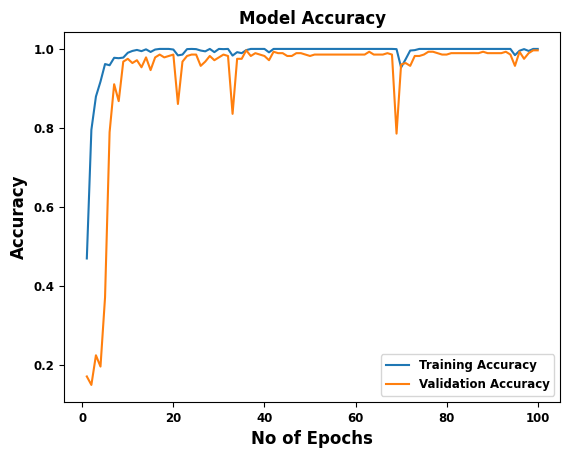

In [53]:
epochs = np.arange(1,101,1)
plt.plot(epochs,acc,label='Training Accuracy')
plt.plot(epochs,val_acc,label='Validation Accuracy')
plt.xlabel("No of Epochs",fontsize=12,fontweight='bold')
plt.ylabel("Accuracy",fontsize=12,fontweight='bold')
plt.title("Model Accuracy",fontsize=12,fontweight='bold')
plt.legend()
plt.savefig('model_accuracy.png')
plt.show()

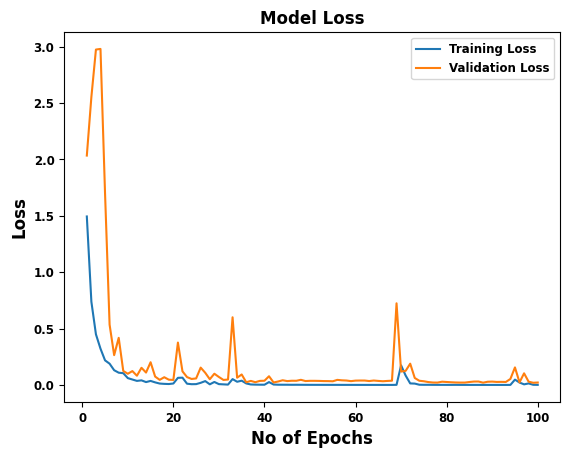

In [54]:
epochs = np.arange(1,101,1)
plt.plot(epochs,loss,label='Training Loss')
plt.plot(epochs,val_loss,label='Validation Loss')
plt.xlabel("No of Epochs",fontsize=12,fontweight='bold')
plt.ylabel("Loss",fontsize=12,fontweight='bold')
plt.title("Model Loss",fontsize=12,fontweight='bold')
plt.legend()
plt.savefig('model_loss.png')
plt.show()

In [15]:
model.load_weights('best_model_chromagram_cnn_lstm.h5')

In [16]:
model.evaluate(X_Test,Y_Test)

18/18 [==============================] - 4s 26ms/step - loss: 0.0203 - accuracy: 0.9929


[0.020271925255656242, 0.9928571581840515]

### Confusion Matrix

In [17]:
font = {'family' : '',
        'weight' : 'bold',
        'size'   : 8.5}

plt.rc('font', **font)

In [18]:
predict_x = model.predict(X_Test)
Y_Pred = np.argmax(predict_x,axis=1)

18/18 [==============================] - 1s 24ms/step


In [19]:
Y_actual = np.argmax(Y_Test,axis=1)

In [20]:
cnf_matrix = confusion_matrix(Y_actual,Y_Pred)
print(cnf_matrix)

[[80  0  0  0  0  0  0]
 [ 0 86  0  1  0  0  0]
 [ 0  0 78  0  0  0  0]
 [ 0  0  0 80  0  0  0]
 [ 0  0  0  0 86  0  0]
 [ 0  1  0  1  0 73  0]
 [ 0  0  0  0  1  0 73]]


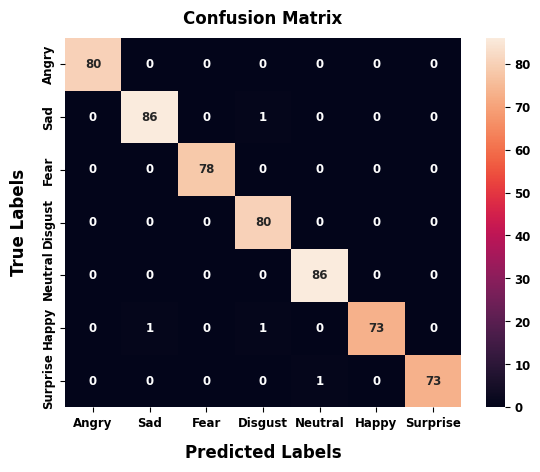

In [56]:
ax= plt.subplot()
sns.heatmap(cnf_matrix, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted Labels',fontsize=12,fontweight='bold',labelpad=10);
ax.set_ylabel('True Labels',fontsize=12,fontweight='bold',labelpad=10); 
ax.set_title('Confusion Matrix',fontsize=12,fontweight='bold',pad=10); 
ax.xaxis.set_ticklabels(['Angry','Sad','Fear','Disgust','Neutral','Happy','Surprise']); ax.yaxis.set_ticklabels(['Angry','Sad','Fear','Disgust','Neutral','Happy','Surprise']);
plt.savefig('confusion_matrix.png')

### Classification Report

In [83]:
print(classification_report(Y_actual, Y_Pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98        80
           1       0.98      0.95      0.97        87
           2       0.99      0.99      0.99        78
           3       0.93      0.96      0.94        80
           4       1.00      0.99      0.99        86
           5       0.95      0.93      0.94        75
           6       0.97      1.00      0.99        74

    accuracy                           0.97       560
   macro avg       0.97      0.97      0.97       560
weighted avg       0.97      0.97      0.97       560



### Sensitivity and Specificity

In [21]:
FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix) 
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)

In [22]:
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

In [23]:
TPR = TP/(TP+FN)
TNR = TN/(TN+FP) 
ACC = (TP+TN)/(TP+FP+FN+TN)
FPR = FP/(FP+TN)

In [24]:
print("Sensitivity = ",TPR)
print("Specificity = ",TNR)
print("accuracy for each class = ",ACC)

Sensitivity =  [1.         0.98850575 1.         1.         1.         0.97333333
 0.98648649]
Specificity =  [1.         0.99788584 1.         0.99583333 0.9978903  1.
 1.        ]
accuracy for each class =  [1.         0.99642857 1.         0.99642857 0.99821429 0.99642857
 0.99821429]


### ROC Curve

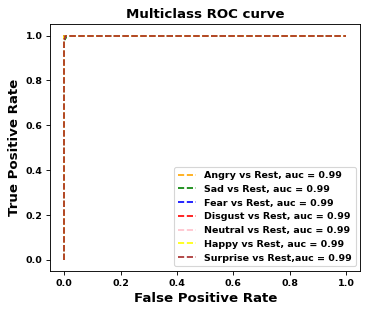

In [31]:
### ROC Curve
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
auc = {}
y_prob_pred_cnb = predict_x

n_class = 7
for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = metrics.roc_curve(Y_actual, y_prob_pred_cnb[:,i], pos_label=i)
    auc[i] = metrics.roc_auc_score(Y_actual,y_prob_pred_cnb,multi_class='ovr',average='weighted')
    
plt.figure(figsize=(5, 4),dpi=80)
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Angry vs Rest, auc = '+str(auc[0])[:4])
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Sad vs Rest, auc = '+str(auc[1])[:4])
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Fear vs Rest, auc = '+str(auc[2])[:4])
plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='Disgust vs Rest, auc = '+str(auc[3])[:4])
plt.plot(fpr[4], tpr[4], linestyle='--',color='pink', label='Neutral vs Rest, auc = '+str(auc[4])[:4])
plt.plot(fpr[5], tpr[5], linestyle='--',color='yellow', label='Happy vs Rest, auc = '+str(auc[5])[:4])
plt.plot(fpr[6], tpr[6], linestyle='--',color='brown', label='Surprise vs Rest,auc = '+str(auc[6])[:4])
plt.title('Multiclass ROC curve',fontsize=12,fontweight='bold')
plt.xlabel('False Positive Rate',fontsize=12,fontweight='bold')
plt.ylabel('True Positive Rate',fontsize=12,fontweight='bold')
plt.legend(loc='best')
plt.savefig('CNN_LSTM_Multiclass_ROC.png',dpi=80);    

## 2. VGG-16

In [24]:
model = VGG16(weights='imagenet',include_top=False,input_shape=(32,130,3))

In [25]:
model.trainable = False

In [26]:
#Functional API
av1 = GlobalAveragePooling2D()(model.output)
dl1 = Dense(256,activation='relu')(av1)
dl2 = Dense(128,activation='relu')(dl1)
dl3 = Dense(7,activation='softmax')(dl2)

model_new = Model(inputs=model.input,outputs=dl3)

In [27]:
adam = Adam(lr=0.00003)
model_new.compile(loss='categorical_crossentropy',optimizer=adam,metrics=['accuracy'])

/home/workspace/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [28]:
early_stop=EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=20)
best_model = ModelCheckpoint('./best_model_chromagram_vgg16.h5', monitor='val_accuracy', mode='max', save_best_only=True)

In [29]:
#Repeat the single channel 3 times to create 3 dimensions as Resnet accepts 3 dimensions. Final Output Size is (2800,12,130,3)
X_Train = np.repeat(X_Train[...,np.newaxis],3,-1) 
X_Test = np.repeat(X_Test[...,np.newaxis],3,-1) 
X_Validation = np.repeat(X_Validation[...,np.newaxis],3,-1) 

In [30]:
X_Train.shape,Y_Train.shape

((1960, 32, 130, 3), (1960, 7))

In [ ]:
hist = model_new.fit(X_Train,Y_Train,shuffle=True,batch_size=16,epochs=100,validation_data=(X_Validation,Y_Validation),callbacks=[early_stop,best_model])

In [31]:
with open('saved_hist_chromagram_vgg16.pkl','rb') as f:
    history = pickle.load(f)

## Plot the results

In [32]:
acc = history['accuracy']
val_acc = history['val_accuracy']
loss = history['loss']
val_loss = history['val_loss']

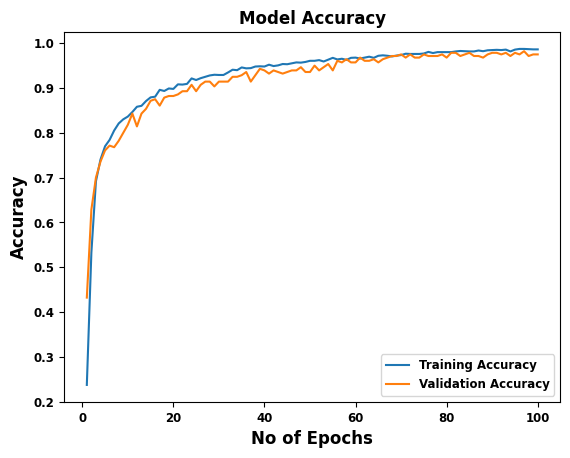

In [98]:
epochs = np.arange(1,101,1)
plt.plot(epochs,acc,label='Training Accuracy')
plt.plot(epochs,val_acc,label='Validation Accuracy')
plt.xlabel("No of Epochs",fontsize=12,fontweight='bold')
plt.ylabel("Accuracy",fontsize=12,fontweight='bold')
plt.title("Model Accuracy",fontsize=12,fontweight='bold')
plt.legend()
plt.savefig('vgg16_model_accuracy')
plt.show()

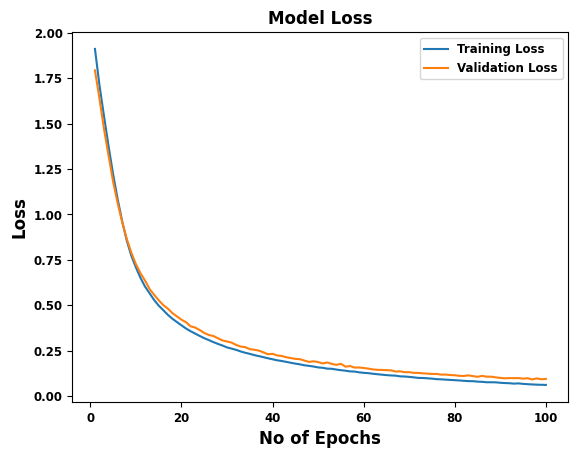

In [99]:
epochs = np.arange(1,101,1)
plt.plot(epochs,loss,label='Training Loss')
plt.plot(epochs,val_loss,label='Validation Loss')
plt.xlabel("No of Epochs",fontsize=12,fontweight='bold')
plt.ylabel("Loss",fontsize=12,fontweight='bold')
plt.title("Model Loss",fontsize=12,fontweight='bold')
plt.legend()
plt.savefig('vgg16_model_loss')
plt.show()

In [49]:
model_new.load_weights('best_model_chromagram_vgg16.h5')

In [50]:
model_new.evaluate(X_Test,Y_Test)

18/18 [==============================] - 6s 331ms/step - loss: 0.1007 - accuracy: 0.9714


[0.10068013519048691, 0.9714285731315613]

### Confusion Matrix

In [51]:
predict_x = model_new.predict(X_Test)
Y_Pred = np.argmax(predict_x,axis=1)

18/18 [==============================] - 6s 324ms/step


In [52]:
Y_actual = np.argmax(Y_Test,axis=1)
Y_Pred
cnf_matrix = confusion_matrix(Y_actual,Y_Pred)
print(cnf_matrix)

[[78  1  0  1  0  0  0]
 [ 0 83  0  1  0  2  1]
 [ 1  0 77  0  0  0  0]
 [ 0  0  0 77  0  2  1]
 [ 0  0  1  0 85  0  0]
 [ 0  1  0  4  0 70  0]
 [ 0  0  0  0  0  0 74]]


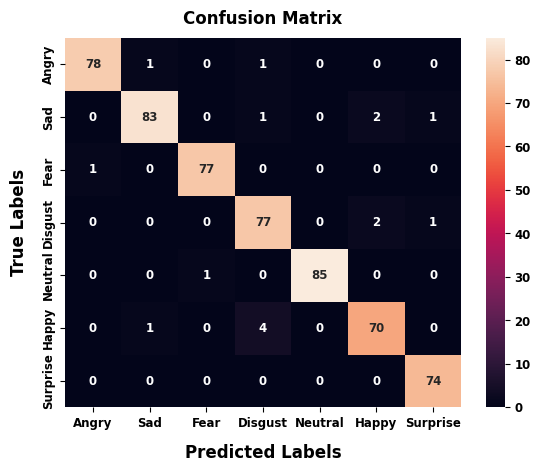

In [104]:
ax= plt.subplot()
sns.heatmap(cnf_matrix, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted Labels',fontsize=12,fontweight='bold',labelpad=10);
ax.set_ylabel('True Labels',fontsize=12,fontweight='bold',labelpad=10); 
ax.set_title('Confusion Matrix',fontsize=12,fontweight='bold',pad=10); 
ax.xaxis.set_ticklabels(['Angry','Sad','Fear','Disgust','Neutral','Happy','Surprise']); ax.yaxis.set_ticklabels(['Angry','Sad','Fear','Disgust','Neutral','Happy','Surprise']);
plt.savefig('vgg16_confusion_matrix')

### Classification Report

In [53]:
print(classification_report(Y_actual, Y_Pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98        80
           1       0.98      0.95      0.97        87
           2       0.99      0.99      0.99        78
           3       0.93      0.96      0.94        80
           4       1.00      0.99      0.99        86
           5       0.95      0.93      0.94        75
           6       0.97      1.00      0.99        74

    accuracy                           0.97       560
   macro avg       0.97      0.97      0.97       560
weighted avg       0.97      0.97      0.97       560



### Sensitivity and Specificity

In [54]:
FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix) 
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)

In [55]:
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

In [56]:
TPR = TP/(TP+FN)
TNR = TN/(TN+FP) 
ACC = (TP+TN)/(TP+FP+FN+TN)
FPR = FP/(FP+TN)

In [57]:
print("Sensitivity = ",TPR)
print("Specificity = ",TNR)
print("accuracy for each class = ",ACC)

Sensitivity =  [0.975      0.95402299 0.98717949 0.9625     0.98837209 0.93333333
 1.        ]
Specificity =  [0.99791667 0.99577167 0.99792531 0.9875     1.         0.99175258
 0.99588477]
accuracy for each class =  [0.99464286 0.98928571 0.99642857 0.98392857 0.99821429 0.98392857
 0.99642857]


### ROC Curve

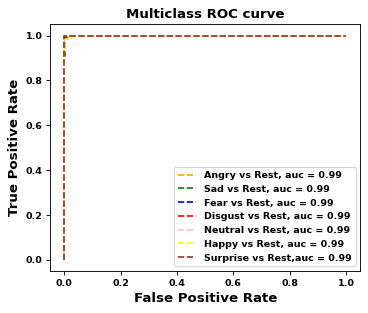

In [135]:
### ROC Curve
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
auc = {}
y_prob_pred_cnb = predict_x

n_class = 7
for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = metrics.roc_curve(Y_actual, y_prob_pred_cnb[:,i], pos_label=i)
    auc[i] = metrics.roc_auc_score(Y_actual,y_prob_pred_cnb,multi_class='ovr',average='weighted')

plt.figure(figsize=(5, 4),dpi=80)
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Angry vs Rest, auc = '+str(auc[0])[:4])
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Sad vs Rest, auc = '+str(auc[1])[:4])
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Fear vs Rest, auc = '+str(auc[2])[:4])
plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='Disgust vs Rest, auc = '+str(auc[3])[:4])
plt.plot(fpr[4], tpr[4], linestyle='--',color='pink', label='Neutral vs Rest, auc = '+str(auc[4])[:4])
plt.plot(fpr[5], tpr[5], linestyle='--',color='yellow', label='Happy vs Rest, auc = '+str(auc[5])[:4])
plt.plot(fpr[6], tpr[6], linestyle='--',color='brown', label='Surprise vs Rest,auc = '+str(auc[6])[:4])
plt.title('Multiclass ROC curve',fontsize=12,fontweight='bold')
plt.xlabel('False Positive Rate',fontsize=12,fontweight='bold')
plt.ylabel('True Positive Rate',fontsize=12,fontweight='bold')
plt.legend(loc='best')
plt.savefig('vgg_16_Multiclass_ROC',dpi=80);    

## 3. Using VGG 19

In [38]:
model = VGG19(weights='imagenet',include_top=False,input_shape=(32,130,3))

In [39]:
model.trainable = False

In [40]:
#Functional API
av1 = GlobalAveragePooling2D()(model.output)
dl1 = Dense(256,activation='relu')(av1)
dl2 = Dense(128,activation='relu')(dl1)
dl3 = Dense(7,activation='softmax')(dl2)

model_new = Model(inputs=model.input,outputs=dl3)

In [41]:
adam = Adam(lr=0.00003)
model_new.compile(loss='categorical_crossentropy',optimizer=adam,metrics=['accuracy'])

In [42]:
early_stop=EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=20)
best_model = ModelCheckpoint('./best_model_chromagram_vgg19.h5', monitor='val_accuracy', mode='max', save_best_only=True)

In [41]:
#Repeat the single channel 3 times to create 3 dimensions as Resnet accepts 3 dimensions. Final Output Size is (2800,12,130,3)
X_Train = np.repeat(X_Train[...,np.newaxis],3,-1) 
X_Test = np.repeat(X_Test[...,np.newaxis],3,-1) 
X_Validation = np.repeat(X_Validation[...,np.newaxis],3,-1) 

In [ ]:
hist = model_new.fit(X_Train,Y_Train,shuffle=True,batch_size=16,epochs=100,validation_data=(X_Validation,Y_Validation),callbacks=[early_stop,best_model])

In [43]:
with open('saved_hist_chromagram_vgg19.pkl','rb') as f:
    history = pickle.load(f)

## Plot the results

In [44]:
acc = history['accuracy']
val_acc = history['val_accuracy']
loss = history['loss']
val_loss = history['val_loss']

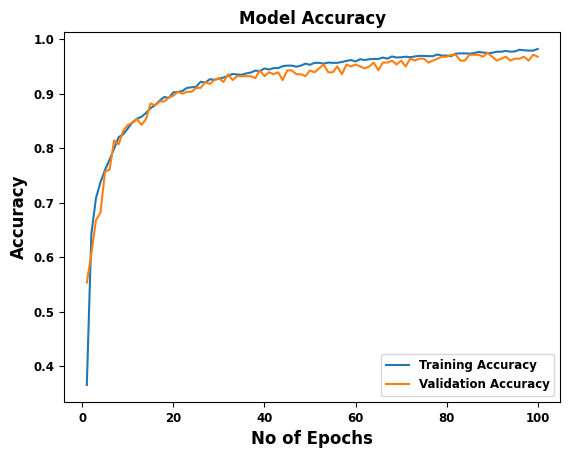

In [119]:
epochs = np.arange(1,101,1)
plt.plot(epochs,acc,label='Training Accuracy')
plt.plot(epochs,val_acc,label='Validation Accuracy')
plt.xlabel("No of Epochs",fontsize=12,fontweight='bold')
plt.ylabel("Accuracy",fontsize=12,fontweight='bold')
plt.title("Model Accuracy",fontsize=12,fontweight='bold')
plt.legend()
plt.savefig('vgg19_model_accuracy')
plt.show()

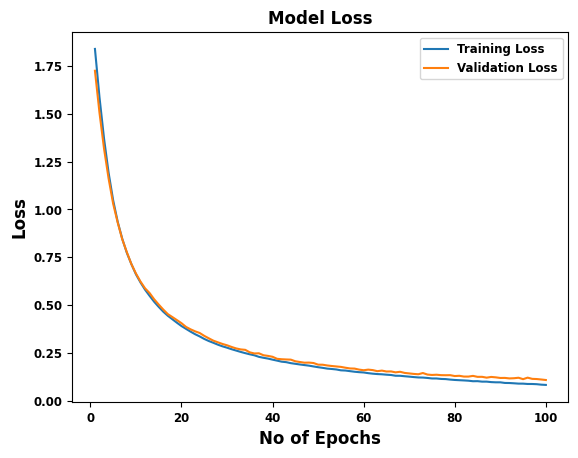

In [120]:
epochs = np.arange(1,101,1)
plt.plot(epochs,loss,label='Training Loss')
plt.plot(epochs,val_loss,label='Validation Loss')
plt.xlabel("No of Epochs",fontsize=12,fontweight='bold')
plt.ylabel("Loss",fontsize=12,fontweight='bold')
plt.title("Model Loss",fontsize=12,fontweight='bold')
plt.legend()
plt.savefig('vgg19_model_loss')
plt.show()

In [66]:
model_new.load_weights('best_model_chromagram_vgg19.h5')

In [67]:
model_new.evaluate(X_Test,Y_Test)

18/18 [==============================] - 7s 387ms/step - loss: 0.1365 - accuracy: 0.9518


[0.1365021914243698, 0.9517857432365417]

### Confusion Matrix

In [68]:
predict_x = model_new.predict(X_Test)
Y_Pred = np.argmax(predict_x,axis=1)

18/18 [==============================] - 8s 413ms/step


In [69]:
Y_actual = np.argmax(Y_Test,axis=1)
cnf_matrix = confusion_matrix(Y_actual,Y_Pred)
print(cnf_matrix)

[[79  0  0  1  0  0  0]
 [ 0 83  0  2  0  1  1]
 [ 2  0 76  0  0  0  0]
 [ 1  0  1 68  0  9  1]
 [ 2  0  0  0 84  0  0]
 [ 0  1  0  4  0 70  0]
 [ 0  0  1  0  0  0 73]]


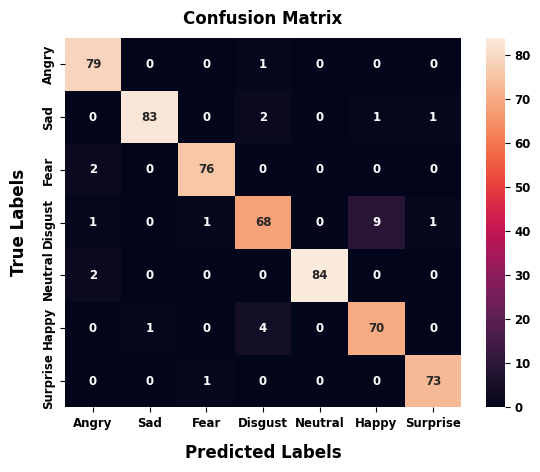

In [125]:
ax= plt.subplot()
sns.heatmap(cnf_matrix, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted Labels',fontsize=12,fontweight='bold',labelpad=10);
ax.set_ylabel('True Labels',fontsize=12,fontweight='bold',labelpad=10); 
ax.set_title('Confusion Matrix',fontsize=12,fontweight='bold',pad=10); 
ax.xaxis.set_ticklabels(['Angry','Sad','Fear','Disgust','Neutral','Happy','Surprise']); ax.yaxis.set_ticklabels(['Angry','Sad','Fear','Disgust','Neutral','Happy','Surprise']);
plt.savefig('vgg19_confusion_matrix')

### Classification Report

In [70]:
print(classification_report(Y_actual, Y_Pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96        80
           1       0.99      0.95      0.97        87
           2       0.97      0.97      0.97        78
           3       0.91      0.85      0.88        80
           4       1.00      0.98      0.99        86
           5       0.88      0.93      0.90        75
           6       0.97      0.99      0.98        74

    accuracy                           0.95       560
   macro avg       0.95      0.95      0.95       560
weighted avg       0.95      0.95      0.95       560



### Sensitivity and Specificity

In [71]:
FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix) 
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)

In [72]:
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

In [73]:
TPR = TP/(TP+FN)
TNR = TN/(TN+FP) 
ACC = (TP+TN)/(TP+FP+FN+TN)
FPR = FP/(FP+TN)

In [74]:
print("Sensitivity = ",TPR)
print("Specificity = ",TNR)
print("accuracy for each class = ",ACC)

Sensitivity =  [0.9875     0.95402299 0.97435897 0.85       0.97674419 0.93333333
 0.98648649]
Specificity =  [0.98958333 0.99788584 0.99585062 0.98541667 1.         0.97938144
 0.99588477]
accuracy for each class =  [0.98928571 0.99107143 0.99285714 0.96607143 0.99642857 0.97321429
 0.99464286]


### ROC Curve

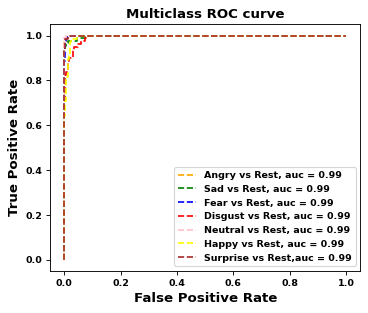

In [75]:
### ROC Curve
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
auc = {}
y_prob_pred_cnb = predict_x

n_class = 7
for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = metrics.roc_curve(Y_actual, y_prob_pred_cnb[:,i], pos_label=i)
    auc[i] = metrics.roc_auc_score(Y_actual,y_prob_pred_cnb,multi_class='ovr',average='weighted')

plt.figure(figsize=(5, 4),dpi=80)
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Angry vs Rest, auc = '+str(auc[0])[:4])
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Sad vs Rest, auc = '+str(auc[1])[:4])
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Fear vs Rest, auc = '+str(auc[2])[:4])
plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='Disgust vs Rest, auc = '+str(auc[3])[:4])
plt.plot(fpr[4], tpr[4], linestyle='--',color='pink', label='Neutral vs Rest, auc = '+str(auc[4])[:4])
plt.plot(fpr[5], tpr[5], linestyle='--',color='yellow', label='Happy vs Rest, auc = '+str(auc[5])[:4])
plt.plot(fpr[6], tpr[6], linestyle='--',color='brown', label='Surprise vs Rest,auc = '+str(auc[6])[:4])
plt.title('Multiclass ROC curve',fontsize=12,fontweight='bold')
plt.xlabel('False Positive Rate',fontsize=12,fontweight='bold')
plt.ylabel('True Positive Rate',fontsize=12,fontweight='bold')
plt.legend(loc='best')
plt.savefig('vgg19_Multiclass_ROC',dpi=80);    

## 4. Using Resnet50

In [46]:
model = ResNet50(include_top=False,weights='imagenet',input_shape=(32,130,3))

In [47]:
# Functional API
av1 = GlobalAveragePooling2D()(model.output)
fc1 = Dense(256,activation='relu')(av1)
d1 = Dropout(0.5)(fc1)
fc2 = Dense(7,activation='softmax')(d1)

model_new = Model(inputs=model.input,outputs=fc2)

In [48]:
adam = Adam(lr=0.00003)
model_new.compile(loss='categorical_crossentropy',optimizer=adam,metrics=['accuracy'])

In [49]:
early_stop=EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=20)
best_model = ModelCheckpoint('./best_model_chromagram_resnet50.h5', monitor='val_accuracy', mode='max', save_best_only=True)

In [50]:
# Perform Fine Tuning -> Train only the few layers at the last
for ix in range(169):
    model_new.layers[ix].trainable = False

In [54]:
#Repeat the single channel 3 times to create 3 dimensions as Resnet accepts 3 dimensions. Final Output Size is (2800,12,130,3)
X_Train = np.repeat(X_Train[...,np.newaxis],3,-1) 
X_Test = np.repeat(X_Test[...,np.newaxis],3,-1) 
X_Validation = np.repeat(X_Validation[...,np.newaxis],3,-1) 

In [ ]:
hist = model_new.fit(X_Train,Y_Train,shuffle=True,batch_size=20,epochs=200,validation_data = (X_Validation,Y_Validation),callbacks=[early_stop,best_model])

In [51]:
with open('saved_hist_chromagram_resnet50.pkl','rb') as f:
    history = pickle.load(f)

## Plot the results

In [52]:
acc = history['accuracy']
val_acc = history['val_accuracy']
loss = history['loss']
val_loss = history['val_loss']

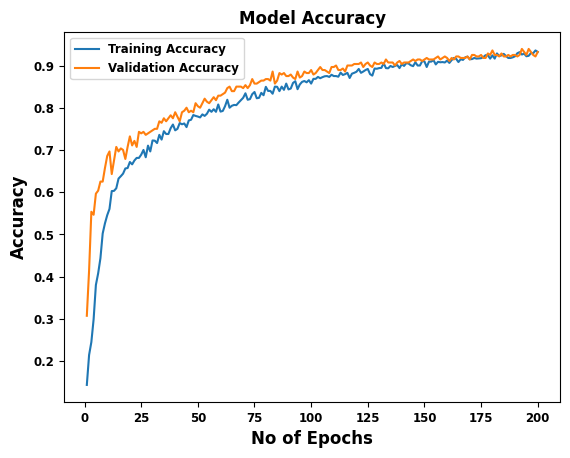

In [84]:
epochs = np.arange(1,201,1)
plt.plot(epochs,acc,label='Training Accuracy')
plt.plot(epochs,val_acc,label='Validation Accuracy')
plt.xlabel("No of Epochs",fontsize=12,fontweight='bold')
plt.ylabel("Accuracy",fontsize=12,fontweight='bold')
plt.title("Model Accuracy",fontsize=12,fontweight='bold')
plt.legend()
plt.savefig('resnet50_model_accuracy')
plt.show()

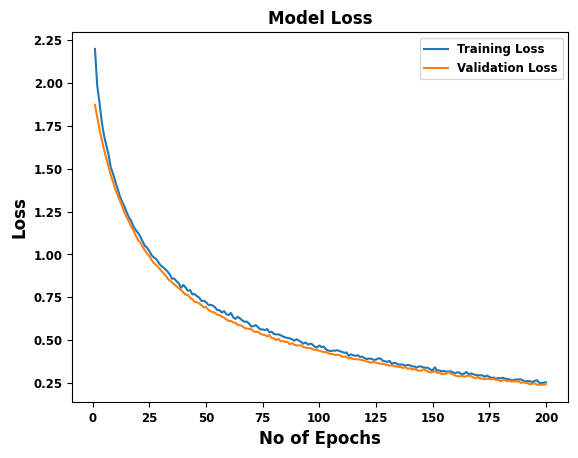

In [85]:
epochs = np.arange(1,201,1)
plt.plot(epochs,loss,label='Training Loss')
plt.plot(epochs,val_loss,label='Validation Loss')
plt.xlabel("No of Epochs",fontsize=12,fontweight='bold')
plt.ylabel("Loss",fontsize=12,fontweight='bold')
plt.title("Model Loss",fontsize=12,fontweight='bold')
plt.legend()
plt.savefig('resnet50_model_loss')
plt.show()

In [86]:
model_new.load_weights('best_model_chromagram_resnet50.h5')

In [87]:
model_new.evaluate(X_Test,Y_Test)

18/18 [==============================] - 4s 150ms/step - loss: 0.2307 - accuracy: 0.9339


[0.23074790835380554, 0.9339285492897034]

### Confusion Matrix

In [88]:
predict_x = model_new.predict(X_Test)
Y_Pred = np.argmax(predict_x,axis=1)

18/18 [==============================] - 3s 141ms/step


In [89]:
Y_actual = np.argmax(Y_Test,axis=1)
cnf_matrix = confusion_matrix(Y_actual,Y_Pred)
print(cnf_matrix)

[[74  3  1  1  0  1  0]
 [ 0 84  0  0  1  2  0]
 [ 0  1 77  0  0  0  0]
 [ 1  0  3 70  0  6  0]
 [ 0  0  0  0 85  1  0]
 [ 1  6  0  7  0 61  0]
 [ 0  2  0  0  0  0 72]]


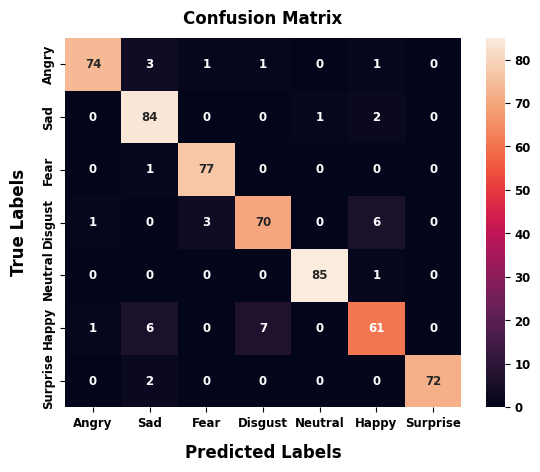

In [146]:
ax= plt.subplot()
sns.heatmap(cnf_matrix, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted Labels',fontsize=12,fontweight='bold',labelpad=10);
ax.set_ylabel('True Labels',fontsize=12,fontweight='bold',labelpad=10); 
ax.set_title('Confusion Matrix',fontsize=12,fontweight='bold',pad=10); 
ax.xaxis.set_ticklabels(['Angry','Sad','Fear','Disgust','Neutral','Happy','Surprise']); ax.yaxis.set_ticklabels(['Angry','Sad','Fear','Disgust','Neutral','Happy','Surprise']);
plt.savefig('resnet50_confusion_matrix')

### Classification Report

In [90]:
print(classification_report(Y_actual, Y_Pred))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95        80
           1       0.88      0.97      0.92        87
           2       0.95      0.99      0.97        78
           3       0.90      0.88      0.89        80
           4       0.99      0.99      0.99        86
           5       0.86      0.81      0.84        75
           6       1.00      0.97      0.99        74

    accuracy                           0.93       560
   macro avg       0.93      0.93      0.93       560
weighted avg       0.93      0.93      0.93       560



### Sensitivity and Specificity

In [91]:
FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix) 
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)

In [92]:
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

In [93]:
TPR = TP/(TP+FN)
TNR = TN/(TN+FP) 
ACC = (TP+TN)/(TP+FP+FN+TN)
FPR = FP/(FP+TN)

In [94]:
print("Sensitivity = ",TPR)
print("Specificity = ",TNR)
print("accuracy for each class = ",ACC)

Sensitivity =  [0.925      0.96551724 0.98717949 0.875      0.98837209 0.81333333
 0.97297297]
Specificity =  [0.99583333 0.97463002 0.99170124 0.98333333 0.9978903  0.97938144
 1.        ]
accuracy for each class =  [0.98571429 0.97321429 0.99107143 0.96785714 0.99642857 0.95714286
 0.99642857]


### ROC Curve

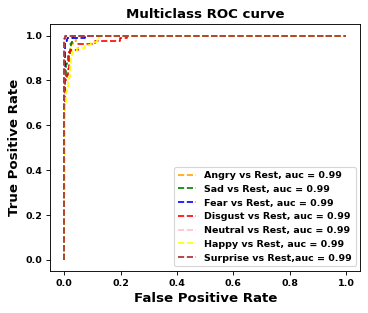

In [95]:
### ROC Curve
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
auc = {}
y_prob_pred_cnb = predict_x

n_class = 7
for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = metrics.roc_curve(Y_actual, y_prob_pred_cnb[:,i], pos_label=i)
    auc[i] = metrics.roc_auc_score(Y_actual,y_prob_pred_cnb,multi_class='ovr',average='weighted')
    
plt.figure(figsize=(5, 4),dpi=80)
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Angry vs Rest, auc = '+str(auc[0])[:4])
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Sad vs Rest, auc = '+str(auc[1])[:4])
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Fear vs Rest, auc = '+str(auc[2])[:4])
plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='Disgust vs Rest, auc = '+str(auc[3])[:4])
plt.plot(fpr[4], tpr[4], linestyle='--',color='pink', label='Neutral vs Rest, auc = '+str(auc[4])[:4])
plt.plot(fpr[5], tpr[5], linestyle='--',color='yellow', label='Happy vs Rest, auc = '+str(auc[5])[:4])
plt.plot(fpr[6], tpr[6], linestyle='--',color='brown', label='Surprise vs Rest,auc = '+str(auc[6])[:4])
plt.title('Multiclass ROC curve',fontsize=12,fontweight='bold')
plt.xlabel('False Positive Rate',fontsize=12,fontweight='bold')
plt.ylabel('True Positive Rate',fontsize=12,fontweight='bold')
plt.legend(loc='best')
plt.savefig('resnet50_Multiclass_ROC',dpi=80);    

## 5. Using RNN+BiLSTM

In [110]:
model = Sequential()
model.add(SimpleRNN(32,input_shape=(32,130)))
model.add(Reshape((32, 1), input_shape=(32,)))
model.add(Bidirectional(LSTM(64,return_sequences=False)))
model.add(Dense(32,activation='relu'))
model.add(Dense(7,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [179]:
## Train the model
best_model = ModelCheckpoint('./best_model_chromagram_rnn_lstm.h5', monitor='val_accuracy', mode='max', save_best_only=True)
history = model.fit(X_Train,Y_Train,validation_data=(X_Validation,Y_Validation),epochs=60,batch_size=16,shuffle=True,callbacks=[best_model])

Epoch 1/60
123/123 [==============================] - 5s 18ms/step - loss: 1.6103 - accuracy: 0.3495 - val_loss: 1.3044 - val_accuracy: 0.4964
Epoch 2/60
123/123 [==============================] - 2s 13ms/step - loss: 1.1131 - accuracy: 0.5551 - val_loss: 1.0443 - val_accuracy: 0.5893
Epoch 3/60
123/123 [==============================] - 2s 14ms/step - loss: 0.9118 - accuracy: 0.6367 - val_loss: 0.8520 - val_accuracy: 0.6500
Epoch 4/60
123/123 [==============================] - 2s 13ms/step - loss: 0.7639 - accuracy: 0.7163 - val_loss: 0.8174 - val_accuracy: 0.7250
Epoch 5/60
123/123 [==============================] - 2s 13ms/step - loss: 0.6561 - accuracy: 0.7648 - val_loss: 0.6697 - val_accuracy: 0.7607
Epoch 6/60
123/123 [==============================] - 2s 14ms/step - loss: 0.5674 - accuracy: 0.8061 - val_loss: 0.5295 - val_accuracy: 0.8143
Epoch 7/60
123/123 [==============================] - 2s 13ms/step - loss: 0.4494 - accuracy: 0.8546 - val_loss: 0.5323 - val_accuracy: 0.8214

Epoch 58/60
123/123 [==============================] - 2s 19ms/step - loss: 0.0900 - accuracy: 0.9724 - val_loss: 0.4350 - val_accuracy: 0.9036
Epoch 59/60
123/123 [==============================] - 2s 19ms/step - loss: 0.0593 - accuracy: 0.9806 - val_loss: 0.4342 - val_accuracy: 0.8857
Epoch 60/60
123/123 [==============================] - 2s 19ms/step - loss: 0.0450 - accuracy: 0.9867 - val_loss: 0.4225 - val_accuracy: 0.9071


In [180]:
with open('saved_hist_chromagram_rnn_bilstm.pkl','wb') as f:
    pickle.dump(history.history,f)

In [111]:
with open('saved_hist_chromagram_rnn_bilstm.pkl','rb') as f:
    history = pickle.load(f)

## Plot the results

In [182]:
acc = history['accuracy']
val_acc = history['val_accuracy']
loss = history['loss']
val_loss = history['val_loss']

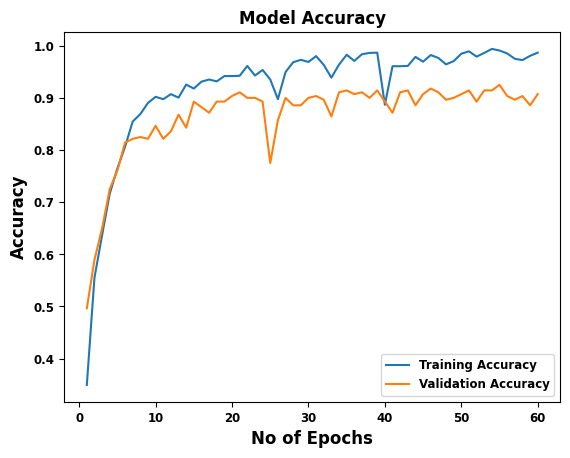

In [183]:
epochs = np.arange(1,61,1)
plt.plot(epochs,acc,label='Training Accuracy')
plt.plot(epochs,val_acc,label='Validation Accuracy')
plt.xlabel("No of Epochs",fontsize=12,fontweight='bold')
plt.ylabel("Accuracy",fontsize=12,fontweight='bold')
plt.title("Model Accuracy",fontsize=12,fontweight='bold')
plt.legend()
plt.savefig('RNN_BiLSTM_model_accuracy')
plt.show()

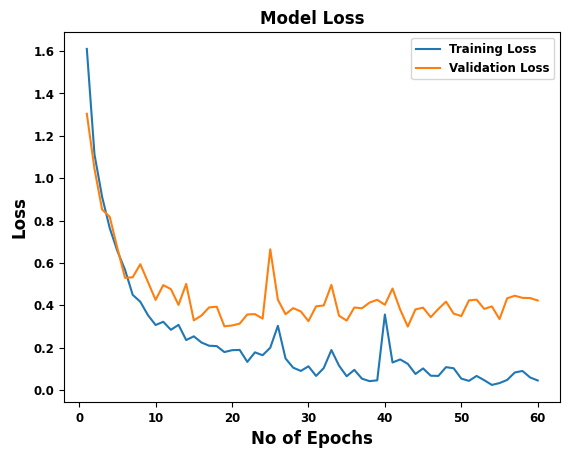

In [184]:
epochs = np.arange(1,61,1)
plt.plot(epochs,loss,label='Training Loss')
plt.plot(epochs,val_loss,label='Validation Loss')
plt.xlabel("No of Epochs",fontsize=12,fontweight='bold')
plt.ylabel("Loss",fontsize=12,fontweight='bold')
plt.title("Model Loss",fontsize=12,fontweight='bold')
plt.legend()
plt.savefig('RNN_BiLSTM_model_loss')
plt.show()

In [112]:
model.load_weights('best_model_chromagram_rnn_lstm.h5')

In [113]:
model.evaluate(X_Test,Y_Test)

18/18 [==============================] - 1s 5ms/step - loss: 0.3827 - accuracy: 0.9071


[0.3827199637889862, 0.9071428775787354]

### Confusion Matrix  

In [114]:
predict_x = model.predict(X_Test)
Y_Pred = np.argmax(predict_x,axis=1)

18/18 [==============================] - 1s 5ms/step


In [115]:
Y_actual = np.argmax(Y_Test,axis=1)
cnf_matrix = confusion_matrix(Y_actual,Y_Pred)
print(cnf_matrix)  

[[73  0  3  1  0  1  2]
 [ 0 75  0  2  0  4  6]
 [ 3  0 69  2  0  2  2]
 [ 7  1  1 67  0  4  0]
 [ 0  0  0  0 84  2  0]
 [ 1  3  0  0  0 70  1]
 [ 0  3  0  0  0  1 70]]


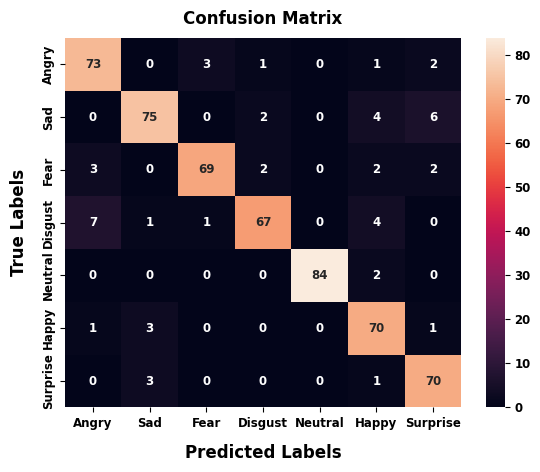

In [189]:
ax= plt.subplot()
sns.heatmap(cnf_matrix, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted Labels',fontsize=12,fontweight='bold',labelpad=10);
ax.set_ylabel('True Labels',fontsize=12,fontweight='bold',labelpad=10); 
ax.set_title('Confusion Matrix',fontsize=12,fontweight='bold',pad=10); 
ax.xaxis.set_ticklabels(['Angry','Sad','Fear','Disgust','Neutral','Happy','Surprise']); ax.yaxis.set_ticklabels(['Angry','Sad','Fear','Disgust','Neutral','Happy','Surprise']);
plt.savefig('RNN_BiLSTM_confusion_matrix')

### Classification Report

In [116]:
print(classification_report(Y_actual, Y_Pred))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89        80
           1       0.91      0.86      0.89        87
           2       0.95      0.88      0.91        78
           3       0.93      0.84      0.88        80
           4       1.00      0.98      0.99        86
           5       0.83      0.93      0.88        75
           6       0.86      0.95      0.90        74

    accuracy                           0.91       560
   macro avg       0.91      0.91      0.91       560
weighted avg       0.91      0.91      0.91       560



### Sensitivity and Specificity

In [117]:
FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix) 
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)

In [118]:
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

In [119]:
TPR = TP/(TP+FN)
TNR = TN/(TN+FP) 
ACC = (TP+TN)/(TP+FP+FN+TN)
FPR = FP/(FP+TN)

In [120]:
print("Sensitivity = ",TPR)
print("Specificity = ",TNR)
print("accuracy for each class = ",ACC)

Sensitivity =  [0.9125     0.86206897 0.88461538 0.8375     0.97674419 0.93333333
 0.94594595]
Specificity =  [0.97708333 0.98520085 0.99170124 0.98958333 1.         0.97113402
 0.97736626]
accuracy for each class =  [0.96785714 0.96607143 0.97678571 0.96785714 0.99642857 0.96607143
 0.97321429]


### ROC Curve

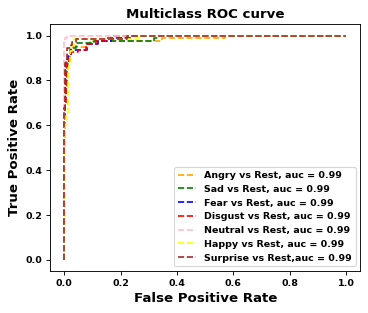

In [121]:
### ROC Curve
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
auc = {}
y_prob_pred_cnb = predict_x

n_class = 7
for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = metrics.roc_curve(Y_actual, y_prob_pred_cnb[:,i], pos_label=i)
    auc[i] = metrics.roc_auc_score(Y_actual,y_prob_pred_cnb,multi_class='ovr',average='weighted')

plt.figure(figsize=(5, 4),dpi=80)
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Angry vs Rest, auc = '+str(auc[0])[:4])
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Sad vs Rest, auc = '+str(auc[1])[:4])
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Fear vs Rest, auc = '+str(auc[2])[:4])
plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='Disgust vs Rest, auc = '+str(auc[3])[:4])
plt.plot(fpr[4], tpr[4], linestyle='--',color='pink', label='Neutral vs Rest, auc = '+str(auc[4])[:4])
plt.plot(fpr[5], tpr[5], linestyle='--',color='yellow', label='Happy vs Rest, auc = '+str(auc[5])[:4])
plt.plot(fpr[6], tpr[6], linestyle='--',color='brown', label='Surprise vs Rest,auc = '+str(auc[6])[:4])
plt.title('Multiclass ROC curve',fontsize=12,fontweight='bold')
plt.xlabel('False Positive Rate',fontsize=12,fontweight='bold')
plt.ylabel('True Positive Rate',fontsize=12,fontweight='bold')
plt.legend(loc='best')
plt.savefig('RNN_BiLSTM_Multiclass_ROC',dpi=80);    

## Using DNN+BiLSTM

In [122]:
model = Sequential()
model.add(Dense(256,activation='relu',input_shape=(32,130)))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Bidirectional(LSTM(64,return_sequences=False)))
model.add(Dense(16,activation='relu'))
model.add(Dense(7,activation='softmax'))

In [123]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [11]:
## Train the model
best_model = ModelCheckpoint('./best_model_chromagram_dnn_lstm.h5', monitor='val_accuracy', mode='max', save_best_only=True)
history = model.fit(X_Train,Y_Train,validation_data=(X_Validation,Y_Validation),epochs=100,batch_size=16,shuffle=True,callbacks=[best_model])

Epoch 1/100
123/123 [==============================] - 5s 19ms/step - loss: 1.2848 - accuracy: 0.5082 - val_loss: 0.8035 - val_accuracy: 0.7321
Epoch 2/100
123/123 [==============================] - 2s 15ms/step - loss: 0.4157 - accuracy: 0.8796 - val_loss: 0.2937 - val_accuracy: 0.8964
Epoch 3/100
123/123 [==============================] - 2s 14ms/step - loss: 0.1715 - accuracy: 0.9480 - val_loss: 0.1076 - val_accuracy: 0.9714
Epoch 4/100
123/123 [==============================] - 2s 15ms/step - loss: 0.0820 - accuracy: 0.9781 - val_loss: 0.1847 - val_accuracy: 0.9393
Epoch 5/100
123/123 [==============================] - 2s 14ms/step - loss: 0.0751 - accuracy: 0.9786 - val_loss: 0.0953 - val_accuracy: 0.9750
Epoch 6/100
123/123 [==============================] - 2s 13ms/step - loss: 0.0501 - accuracy: 0.9842 - val_loss: 0.1471 - val_accuracy: 0.9536
Epoch 7/100
123/123 [==============================] - 2s 13ms/step - loss: 0.0639 - accuracy: 0.9806 - val_loss: 0.0994 - val_accuracy:

In [13]:
with open('saved_hist_chromagram_dnn_bilstm.pkl','wb') as f:
    pickle.dump(history.history,f)

In [124]:
with open('saved_hist_chromagram_dnn_bilstm.pkl','rb') as f:
    history = pickle.load(f)

## Plot the Results

In [163]:
acc = history['accuracy']
val_acc = history['val_accuracy']
loss = history['loss']
val_loss = history['val_loss']

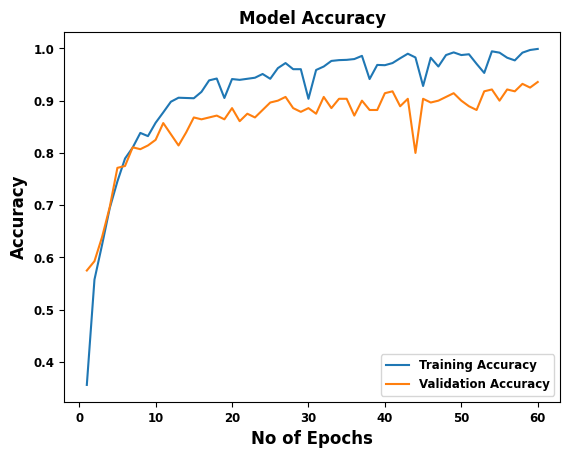

In [164]:
epochs = np.arange(1,61,1)
plt.plot(epochs,acc,label='Training Accuracy')
plt.plot(epochs,val_acc,label='Validation Accuracy')
plt.xlabel("No of Epochs",fontsize=12,fontweight='bold')
plt.ylabel("Accuracy",fontsize=12,fontweight='bold')
plt.title("Model Accuracy",fontsize=12,fontweight='bold')
plt.legend()
plt.savefig('DNN_BiLSTM_model_accuracy')
plt.show()

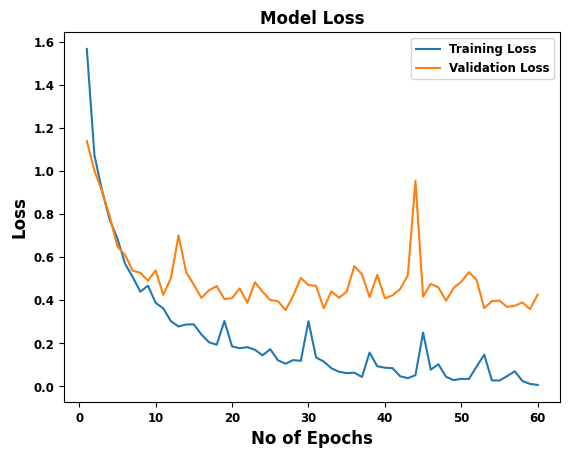

In [165]:
epochs = np.arange(1,61,1)
plt.plot(epochs,loss,label='Training Loss')
plt.plot(epochs,val_loss,label='Validation Loss')
plt.xlabel("No of Epochs",fontsize=12,fontweight='bold')
plt.ylabel("Loss",fontsize=12,fontweight='bold')
plt.title("Model Loss",fontsize=12,fontweight='bold')
plt.legend()
plt.savefig('DNN_BiLSTM_model_loss')
plt.show()

In [125]:
model.load_weights('best_model_chromagram_dnn_lstm.h5')

In [126]:
model.evaluate(X_Test,Y_Test)

18/18 [==============================] - 1s 6ms/step - loss: 0.0442 - accuracy: 0.9893


[0.04421596601605415, 0.9892857074737549]

### Confusion Matrix  

In [127]:
predict_x = model.predict(X_Test)
Y_Pred = np.argmax(predict_x,axis=1)

18/18 [==============================] - 1s 5ms/step


In [128]:
Y_actual = np.argmax(Y_Test,axis=1)
cnf_matrix = confusion_matrix(Y_actual,Y_Pred)
print(cnf_matrix)  

[[79  0  1  0  0  0  0]
 [ 0 87  0  0  0  0  0]
 [ 0  0 78  0  0  0  0]
 [ 0  0  0 77  0  3  0]
 [ 0  0  0  0 85  1  0]
 [ 0  1  0  0  0 74  0]
 [ 0  0  0  0  0  0 74]]


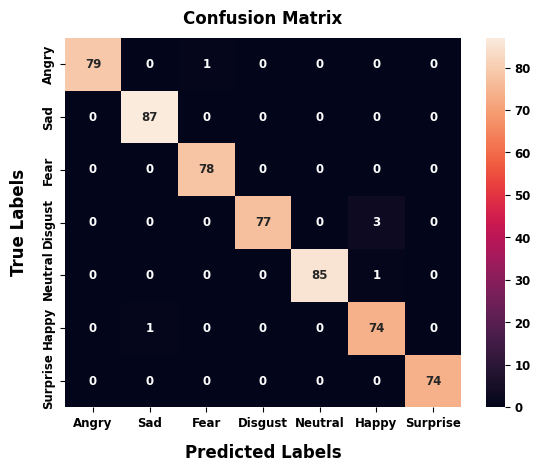

In [170]:
ax= plt.subplot()
sns.heatmap(cnf_matrix, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted Labels',fontsize=12,fontweight='bold',labelpad=10);
ax.set_ylabel('True Labels',fontsize=12,fontweight='bold',labelpad=10); 
ax.set_title('Confusion Matrix',fontsize=12,fontweight='bold',pad=10); 
ax.xaxis.set_ticklabels(['Angry','Sad','Fear','Disgust','Neutral','Happy','Surprise']); ax.yaxis.set_ticklabels(['Angry','Sad','Fear','Disgust','Neutral','Happy','Surprise']);
plt.savefig('DNN_BiLSTM_confusion_matrix')

### Classification Report

In [129]:
print(classification_report(Y_actual, Y_Pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        80
           1       0.99      1.00      0.99        87
           2       0.99      1.00      0.99        78
           3       1.00      0.96      0.98        80
           4       1.00      0.99      0.99        86
           5       0.95      0.99      0.97        75
           6       1.00      1.00      1.00        74

    accuracy                           0.99       560
   macro avg       0.99      0.99      0.99       560
weighted avg       0.99      0.99      0.99       560



### Sensitivity and Specificity

In [130]:
FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix) 
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)

In [131]:
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

In [132]:
TPR = TP/(TP+FN)
TNR = TN/(TN+FP) 
ACC = (TP+TN)/(TP+FP+FN+TN)
FPR = FP/(FP+TN)

In [133]:
print("Sensitivity = ",TPR)
print("Specificity = ",TNR)
print("accuracy for each class = ",ACC)

Sensitivity =  [0.9875     1.         1.         0.9625     0.98837209 0.98666667
 1.        ]
Specificity =  [1.         0.99788584 0.99792531 1.         1.         0.99175258
 1.        ]
accuracy for each class =  [0.99821429 0.99821429 0.99821429 0.99464286 0.99821429 0.99107143
 1.        ]


### ROC Curve

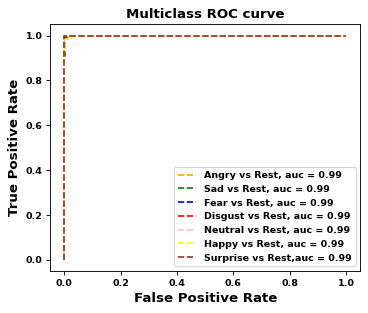

In [134]:
### ROC Curve
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
auc = {}
y_prob_pred_cnb = predict_x

n_class = 7
for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = metrics.roc_curve(Y_actual, y_prob_pred_cnb[:,i], pos_label=i)
    auc[i] = metrics.roc_auc_score(Y_actual,y_prob_pred_cnb,multi_class='ovr',average='weighted')

plt.figure(figsize=(5, 4),dpi=80)
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Angry vs Rest, auc = '+str(auc[0])[:4])
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Sad vs Rest, auc = '+str(auc[1])[:4])
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Fear vs Rest, auc = '+str(auc[2])[:4])
plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='Disgust vs Rest, auc = '+str(auc[3])[:4])
plt.plot(fpr[4], tpr[4], linestyle='--',color='pink', label='Neutral vs Rest, auc = '+str(auc[4])[:4])
plt.plot(fpr[5], tpr[5], linestyle='--',color='yellow', label='Happy vs Rest, auc = '+str(auc[5])[:4])
plt.plot(fpr[6], tpr[6], linestyle='--',color='brown', label='Surprise vs Rest,auc = '+str(auc[6])[:4])
plt.title('Multiclass ROC curve',fontsize=12,fontweight='bold')
plt.xlabel('False Positive Rate',fontsize=12,fontweight='bold')
plt.ylabel('True Positive Rate',fontsize=12,fontweight='bold')
plt.legend(loc='best')
plt.savefig('DNN_BiLSTM_Multiclass_ROC',dpi=80);    